# Анализ мобильного приложения "Ненужные вещи"

## Проведем предобработку данных:

  - Датасеты проверим на дубликаты;
  
  - Датасеты проверим на пропуски;
  
  - Приведем названия столбцов в порядок(если потребуется);
  
  - Приведем к нужному типу дата и время(если потребуется)
  
## Проведем исследовательский анализ данных:

  - Узнаем, пользователи какой группы склонны часто возвращаться в мобильное приложение(RETENTION RATE);
  
  - Узнаем, пользователи какой группы часто делают целевое событие(конверсия в целевое действие);
  
  - Узнаем, как распределяется время между распространенными событиями пользователей из разных групп;
  
 
## Выделим сегменты пользователей для управления вовлеченностью:
  
  - Выделим целевую и смежную аудиторию;
  
  - Посмотрим частоту действий пользователей каждой группы по неделям.
  
  
## Сформулируем и проверим гипотезы:
  
  - Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверим гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.
  
  - Сформулируем нулевую гипотезу:

     - Разницы в количестве событий, от общего числа событий, между группами нет
     
  - Сформулируем альтернативную гипотезу:   
     
     - Разница в количестве событий, от общего числа событий, между группами есть
     
     
## Напишем выводы и рекомендации
  

# **Описание данных:**

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет **mobile_dataset.csv** содержит колонки:

- `event.time` — время совершения

- `event.name` — название события

- `user.id` — идентификатор пользователя

Датасет **mobile_sources.csv** содержит колонки:

- `userId` — идентификатор пользователя

- `source` — источник, с которого пользователь установил приложение

Расшифровки событий:

- `advert_open` — открытие карточки объявления

- `photos_show` — просмотр фотографий в объявлении

- `tips_show` — пользователь увидел рекомендованные объявления

- `tips_click` — пользователь кликнул по рекомендованному объявлению

- `contacts_show` и `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления

- `contacts_call` — пользователь позвонил по номеру телефона на карточке объявления

- `map` — пользователь открыл карту размещенных объявлений

- `search_1` — `search_7` — разные события, связанные с поиском по сайту

- `favorites_add` — добавление объявления в избранное


In [2]:
import pandas as pd
import numpy as np
import math as mth
import seaborn as sns
sns.set(rc={'figure.figsize':(16, 9)})
import matplotlib.pyplot as plt
from scipy import stats as st
import itertools
from datetime import datetime, timedelta

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

In [4]:
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [5]:
mobile_sourсes = mobile_sourсes.rename(columns={'userId': 'user_id'})

***Переименуем***

In [6]:
mobile_sourсes.head()

,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [7]:
mobile_sourсes.duplicated().sum()

0

In [8]:
mobile_sourсes.isna().sum()

user_id    0
source     0
dtype: int64

***В датасете mobile_sourсes дубликатв и пропусков нет***

In [9]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [10]:
mobile_dataset = mobile_dataset.rename(columns={'event.time': 'event_time', 'event.name': 'event_name', 'user.id': 'user_id'})

***Переименуем***

In [11]:
mobile_dataset.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [12]:
mobile_dataset.duplicated().sum()

0

In [13]:
mobile_dataset.isna().sum()

event_time    0
event_name    0
user_id       0
dtype: int64

***В датасете mobile_dataset дубликатов и пропусков нет***

In [14]:
mobile_dataset['event_time'].min()

'2019-10-07 00:00:00.431357'

In [15]:
mobile_dataset['event_time'].max()

'2019-11-03 23:58:12.532487'

In [16]:
mobile_sourсes.groupby('source')['user_id'].nunique()

source
google    1129
other     1230
yandex    1934
Name: user_id, dtype: int64

***Больше всего устанавливают приложение с yandex(1934), из google(1129), из других иточников(1230)***

In [17]:
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'])

In [18]:
mobile_dataset.groupby('event_name')['user_id'].count().sort_values(ascending=False)

event_name
tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: user_id, dtype: int64

На первом месте `tips_show` — пользователь увидел рекомендованные объявления(40055)

На втором месте `photos_show` — просмотр фотографий в объявлении(10012)

На третьем месте `advert_open` — открытие карточки объявления(6164)

На четвертом месте `contacts_show` - пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления(4450)

На пятом месте `map` — пользователь открыл карту размещенных объявлений(3881)

На шестом месте  `favorites_add` — добавление объявления в избранное(1417)

На седьмом месте `tips_click` — пользователь кликнул по рекомендованному объявлению(814)

На восьмом месте `contacts_call` — пользователь позвонил по номеру телефона на карточке объявления(541)

На девятом месте `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления(79)

***Объединим столбцы contacts_show и show_contacts***

In [19]:
mobile_dataset['event_name'] = mobile_dataset['event_name'].str.replace('show_contacts', 'contacts_show', regex=True)

In [20]:
mobile_dataset.groupby('event_name')['user_id'].count().sort_values(ascending=False)

event_name
tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: user_id, dtype: int64

***Выделим сессии, каждую по отдельности, длительностью более 30 минут, этого времени достаточно чтобы увидеть обьявление, рассмотреть его, позвонить и сделать заказ***


In [21]:
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'])
g=(mobile_dataset.groupby('user_id')['event_time'].diff() > pd.Timedelta('30Min')).cumsum()
mobile_dataset['session_id'] = mobile_dataset.groupby(['user_id', g], sort=False).ngroup() + 1
display (mobile_dataset)

,event_time,event_name,user_id,session_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,1
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,1
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,1
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2
...,...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,26837
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,26837
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902,26838
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,26839


In [22]:
mobile_dataset['active_date'] = mobile_dataset['event_time'].astype('datetime64[M]')
mobile_dataset['first_ts'] = mobile_dataset.groupby('user_id')['event_time'].transform('min').astype('datetime64[M]')
mobile_dataset['lifetime'] = mobile_dataset['active_date'] - mobile_dataset['first_ts']
mobile_dataset

,event_time,event_name,user_id,session_id,active_date,first_ts,lifetime
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,1,2019-10-01,2019-10-01,0 days
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,1,2019-10-01,2019-10-01,0 days
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,2019-10-01,2019-10-01,0 days
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,1,2019-10-01,2019-10-01,0 days
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,2019-10-01,2019-10-01,0 days
...,...,...,...,...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,26837,2019-11-01,2019-10-01,31 days
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,26837,2019-11-01,2019-10-01,31 days
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902,26838,2019-11-01,2019-10-01,31 days
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,26839,2019-11-01,2019-10-01,31 days


# Узнаем, пользователи какой группы склонны часто возвращаться в мобильное приложение(RETENTION RATE)


In [23]:
mobile_app = mobile_sourсes.merge(mobile_dataset, on = 'user_id', how = 'left')

***Напишем функцию get_profiles(). В ней сгруппируем значения датафрейма по пользовательскому ID и применим функцию first(). Определим дату первого посещения и первый день месяца, в который это посещение произошло***

In [24]:
def get_profiles(mobile_app):
    profiles = (
        mobile_app.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first', 'source': 'first'})
        .rename(columns={'event_time': 'first_ts'})
        .reset_index()  
    )
        
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['active_date'] = profiles['first_ts'].astype('datetime64[M]')

    return profiles

In [25]:
profiles = get_profiles(mobile_app)
profiles

,user_id,first_ts,source,dt,active_date
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,yandex,2019-10-19,2019-10-01
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35.385028,yandex,2019-11-01,2019-11-01
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05.555052,google,2019-10-18,2019-10-01
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41.263364,yandex,2019-10-25,2019-10-01
...,...,...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27.414960,yandex,2019-10-13,2019-10-01
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:49.997044,yandex,2019-10-07,2019-10-01
4290,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35.199237,google,2019-10-23,2019-10-01
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21 16:39:33.867145,yandex,2019-10-21,2019-10-01


***Результат — 4293 пользовательских профилей, в каждом из которых есть данные о дате первого посещения и сервисе с которого было скачано мобильное приложение.***

***Обозначим сегментацию по источникам привлечения, получим 3 группы: yandex, google и other(другие сервисы). При рассмотрении этих трех групп, можно будет сделать вывод,из какой группы в приложение попадает больше всего пользователей, в какую группу стоит вкладываться в рекламу, а в какую нет***

In [26]:
profiles.groupby('source').agg({'user_id': 'nunique'})

,user_id
source,
google,1129
other,1230
yandex,1934


***Построим график, отображающий динамику привлечения новых пользователей по каждому из сервисов.***

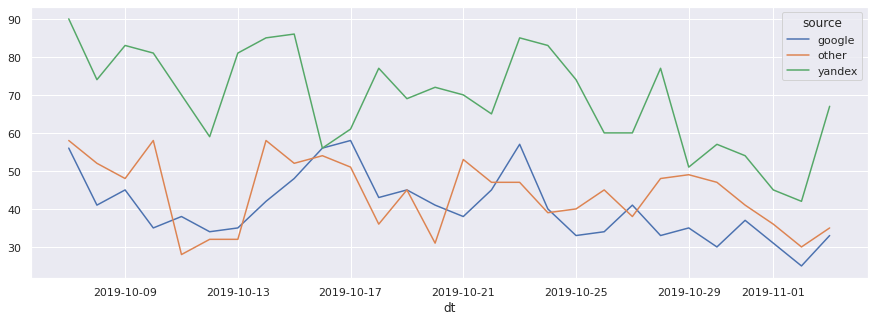

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

profiles.pivot_table(
    index='dt',
    columns='source',
    values='user_id',
    aggfunc='nunique'
).plot(figsize=(15, 5), grid=True)

plt.show()

***За 3 недели посетители чаще всего приходили из сервиса yandex, из сервиса google и других источников приходило меньше, но примерно в одинаковом количестве. Все источники изо дня в день не стабильны по количеству привлеченных пользователей.***

In [28]:
result_raw = profiles.merge(
    mobile_app[['user_id', 'event_time']], on='user_id', how='left'
)

result_raw

,user_id,first_ts,source,dt,active_date,event_time
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01,2019-10-07 13:39:45.989359
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01,2019-10-07 13:40:31.052909
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01,2019-10-07 13:41:05.722489
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01,2019-10-07 13:43:20.735461
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01,2019-10-07 13:45:30.917502
...,...,...,...,...,...,...
74192,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-10-12 00:57:21.241896,google,2019-10-12,2019-10-01,2019-11-03 15:51:23.959572
74193,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-10-12 00:57:21.241896,google,2019-10-12,2019-10-01,2019-11-03 15:51:57.899997
74194,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-10-12 00:57:21.241896,google,2019-10-12,2019-10-01,2019-11-03 16:07:40.932077
74195,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-10-12 00:57:21.241896,google,2019-10-12,2019-10-01,2019-11-03 16:08:18.202734


***Вычисляем лайфтайм для каждой сессии в днях***

In [29]:
result_raw['lifetime'] = (
    result_raw['event_time'] - result_raw['first_ts']
).dt.days

result_raw.head(20)

,user_id,first_ts,source,dt,active_date,event_time,lifetime
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01,2019-10-07 13:39:45.989359,0
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01,2019-10-07 13:40:31.052909,0
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01,2019-10-07 13:41:05.722489,0
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01,2019-10-07 13:43:20.735461,0
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01,2019-10-07 13:45:30.917502,0
5,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01,2019-10-07 13:45:43.212340,0
6,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01,2019-10-07 13:46:31.033718,0
7,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01,2019-10-07 13:47:32.860234,0
8,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01,2019-10-07 13:49:41.716617,0
9,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01,2019-10-09 18:33:55.577963,2


***Строим таблицу удержания***

In [30]:
result_grouped = result_raw.pivot_table(
    index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
)

result_grouped

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
dt,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-07,204.00,25.00,20.00,22.00,11.00,8.00,12.00,16.00,11.00,10.00,10.00,7.00,5.00,12.00,10.00,10.00,10.00,4.00,9.00,5.00,3.00,4.00,7.00,7.00,8.00,9.00,6.00
2019-10-08,167.00,27.00,21.00,9.00,7.00,11.00,9.00,12.00,10.00,7.00,10.00,4.00,5.00,6.00,6.00,7.00,5.00,5.00,3.00,8.00,6.00,3.00,4.00,7.00,5.00,4.00,2.00
2019-10-09,176.00,13.00,11.00,10.00,12.00,12.00,10.00,13.00,11.00,6.00,4.00,5.00,6.00,10.00,5.00,5.00,2.00,3.00,2.00,5.00,2.00,6.00,2.00,1.00,4.00,3.00,NaN
2019-10-10,174.00,16.00,18.00,14.00,17.00,14.00,12.00,9.00,14.00,6.00,6.00,9.00,8.00,7.00,6.00,5.00,9.00,11.00,6.00,5.00,3.00,7.00,3.00,2.00,2.00,NaN,NaN
2019-10-11,136.00,12.00,16.00,13.00,12.00,10.00,10.00,6.00,2.00,6.00,5.00,5.00,7.00,5.00,6.00,2.00,9.00,8.00,4.00,3.00,3.00,4.00,4.00,2.00,NaN,NaN,NaN
2019-10-12,125.00,16.00,20.00,7.00,8.00,11.00,10.00,11.00,10.00,8.00,8.00,5.00,9.00,6.00,7.00,6.00,4.00,5.00,5.00,3.00,3.00,8.00,4.00,NaN,NaN,NaN,NaN
2019-10-13,148.00,19.00,10.00,8.00,10.00,8.00,8.00,7.00,7.00,7.00,6.00,6.00,7.00,7.00,9.00,1.00,1.00,2.00,3.00,2.00,5.00,1.00,NaN,NaN,NaN,NaN,NaN
2019-10-14,185.00,21.00,19.00,19.00,15.00,13.00,10.00,8.00,14.00,7.00,7.00,9.00,3.00,12.00,6.00,7.00,9.00,7.00,4.00,3.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-15,186.00,26.00,17.00,15.00,10.00,10.00,15.00,14.00,12.00,4.00,7.00,7.00,6.00,7.00,6.00,6.00,6.00,6.00,5.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Вычислим размеры когорт.***

In [31]:
cohort_sizes = (
    result_raw.groupby('dt')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

cohort_sizes

,cohort_size
dt,
2019-10-07,204
2019-10-08,167
2019-10-09,176
2019-10-10,174
2019-10-11,136
2019-10-12,125
2019-10-13,148
2019-10-14,185
2019-10-15,186


***Объединяем размеры когорт и таблицу удержания***

In [32]:
result_grouped = cohort_sizes.merge(
    result_grouped, on='dt', how='left'
).fillna(0)

result_grouped

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
dt,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-07,204,204.00,25.00,20.00,22.00,11.00,8.00,12.00,16.00,11.00,10.00,10.00,7.00,5.00,12.00,10.00,10.00,10.00,4.00,9.00,5.00,3.00,4.00,7.00,7.00,8.00,9.00,6.00
2019-10-08,167,167.00,27.00,21.00,9.00,7.00,11.00,9.00,12.00,10.00,7.00,10.00,4.00,5.00,6.00,6.00,7.00,5.00,5.00,3.00,8.00,6.00,3.00,4.00,7.00,5.00,4.00,2.00
2019-10-09,176,176.00,13.00,11.00,10.00,12.00,12.00,10.00,13.00,11.00,6.00,4.00,5.00,6.00,10.00,5.00,5.00,2.00,3.00,2.00,5.00,2.00,6.00,2.00,1.00,4.00,3.00,0.00
2019-10-10,174,174.00,16.00,18.00,14.00,17.00,14.00,12.00,9.00,14.00,6.00,6.00,9.00,8.00,7.00,6.00,5.00,9.00,11.00,6.00,5.00,3.00,7.00,3.00,2.00,2.00,0.00,0.00
2019-10-11,136,136.00,12.00,16.00,13.00,12.00,10.00,10.00,6.00,2.00,6.00,5.00,5.00,7.00,5.00,6.00,2.00,9.00,8.00,4.00,3.00,3.00,4.00,4.00,2.00,0.00,0.00,0.00
2019-10-12,125,125.00,16.00,20.00,7.00,8.00,11.00,10.00,11.00,10.00,8.00,8.00,5.00,9.00,6.00,7.00,6.00,4.00,5.00,5.00,3.00,3.00,8.00,4.00,0.00,0.00,0.00,0.00
2019-10-13,148,148.00,19.00,10.00,8.00,10.00,8.00,8.00,7.00,7.00,7.00,6.00,6.00,7.00,7.00,9.00,1.00,1.00,2.00,3.00,2.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00
2019-10-14,185,185.00,21.00,19.00,19.00,15.00,13.00,10.00,8.00,14.00,7.00,7.00,9.00,3.00,12.00,6.00,7.00,9.00,7.00,4.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
2019-10-15,186,186.00,26.00,17.00,15.00,10.00,10.00,15.00,14.00,12.00,4.00,7.00,7.00,6.00,7.00,6.00,6.00,6.00,6.00,5.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


***Рассчитаем коэффициенты удержания. Делим данные таблицы удержания на размеры когорт***

In [33]:
result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0
).drop(columns=['cohort_size'])

result_grouped

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
dt,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-07,1.00,0.12,0.10,0.11,0.05,0.04,0.06,0.08,0.05,0.05,0.05,0.03,0.02,0.06,0.05,0.05,0.05,0.02,0.04,0.02,0.01,0.02,0.03,0.03,0.04,0.04,0.03
2019-10-08,1.00,0.16,0.13,0.05,0.04,0.07,0.05,0.07,0.06,0.04,0.06,0.02,0.03,0.04,0.04,0.04,0.03,0.03,0.02,0.05,0.04,0.02,0.02,0.04,0.03,0.02,0.01
2019-10-09,1.00,0.07,0.06,0.06,0.07,0.07,0.06,0.07,0.06,0.03,0.02,0.03,0.03,0.06,0.03,0.03,0.01,0.02,0.01,0.03,0.01,0.03,0.01,0.01,0.02,0.02,0.00
2019-10-10,1.00,0.09,0.10,0.08,0.10,0.08,0.07,0.05,0.08,0.03,0.03,0.05,0.05,0.04,0.03,0.03,0.05,0.06,0.03,0.03,0.02,0.04,0.02,0.01,0.01,0.00,0.00
2019-10-11,1.00,0.09,0.12,0.10,0.09,0.07,0.07,0.04,0.01,0.04,0.04,0.04,0.05,0.04,0.04,0.01,0.07,0.06,0.03,0.02,0.02,0.03,0.03,0.01,0.00,0.00,0.00
2019-10-12,1.00,0.13,0.16,0.06,0.06,0.09,0.08,0.09,0.08,0.06,0.06,0.04,0.07,0.05,0.06,0.05,0.03,0.04,0.04,0.02,0.02,0.06,0.03,0.00,0.00,0.00,0.00
2019-10-13,1.00,0.13,0.07,0.05,0.07,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.05,0.05,0.06,0.01,0.01,0.01,0.02,0.01,0.03,0.01,0.00,0.00,0.00,0.00,0.00
2019-10-14,1.00,0.11,0.10,0.10,0.08,0.07,0.05,0.04,0.08,0.04,0.04,0.05,0.02,0.06,0.03,0.04,0.05,0.04,0.02,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00
2019-10-15,1.00,0.14,0.09,0.08,0.05,0.05,0.08,0.08,0.06,0.02,0.04,0.04,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [34]:
observation_date = datetime(2019, 11, 16).date()
horizon_days = 21

ignore_horizon = False

**Рассчитываем максимально возможную дату привлечения***

In [35]:

last_suitable_acquisition_date = observation_date
if not ignore_horizon:
    last_suitable_acquisition_date = observation_date - timedelta(
        days=horizon_days - 1
    )


result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

result_raw

,user_id,first_ts,source,dt,active_date
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,yandex,2019-10-19,2019-10-01
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05.555052,google,2019-10-18,2019-10-01
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41.263364,yandex,2019-10-25,2019-10-01
5,00554293-7e00-4122-b898-4e892c4a7c53,2019-10-27 12:32:28.005179,yandex,2019-10-27,2019-10-01
...,...,...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27.414960,yandex,2019-10-13,2019-10-01
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:49.997044,yandex,2019-10-07,2019-10-01
4290,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35.199237,google,2019-10-23,2019-10-01
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21 16:39:33.867145,yandex,2019-10-21,2019-10-01


***Рассчитываем коэффициент удержания***

In [36]:

result_raw = result_raw.merge(
    mobile_app[['user_id', 'event_time']], on='user_id', how='left'
)

result_raw['lifetime'] = (
    result_raw['event_time'] - result_raw['first_ts']
).dt.days

result_grouped = result_raw.pivot_table(
    index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
) 

cohort_sizes = (
    result_raw.groupby('dt')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

result_grouped = cohort_sizes.merge(
    result_grouped, on='dt', how='left'
).fillna(0) 


result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)


result_grouped = result_grouped[['cohort_size'] + list(range(horizon_days))]

result_grouped['cohort_size'] = cohort_sizes

result_grouped

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
dt,,,,,,,,,,,,,,,,,,,,,,
2019-10-07,204,1.00,0.12,0.10,0.11,0.05,0.04,0.06,0.08,0.05,0.05,0.05,0.03,0.02,0.06,0.05,0.05,0.05,0.02,0.04,0.02,0.01
2019-10-08,167,1.00,0.16,0.13,0.05,0.04,0.07,0.05,0.07,0.06,0.04,0.06,0.02,0.03,0.04,0.04,0.04,0.03,0.03,0.02,0.05,0.04
2019-10-09,176,1.00,0.07,0.06,0.06,0.07,0.07,0.06,0.07,0.06,0.03,0.02,0.03,0.03,0.06,0.03,0.03,0.01,0.02,0.01,0.03,0.01
2019-10-10,174,1.00,0.09,0.10,0.08,0.10,0.08,0.07,0.05,0.08,0.03,0.03,0.05,0.05,0.04,0.03,0.03,0.05,0.06,0.03,0.03,0.02
2019-10-11,136,1.00,0.09,0.12,0.10,0.09,0.07,0.07,0.04,0.01,0.04,0.04,0.04,0.05,0.04,0.04,0.01,0.07,0.06,0.03,0.02,0.02
2019-10-12,125,1.00,0.13,0.16,0.06,0.06,0.09,0.08,0.09,0.08,0.06,0.06,0.04,0.07,0.05,0.06,0.05,0.03,0.04,0.04,0.02,0.02
2019-10-13,148,1.00,0.13,0.07,0.05,0.07,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.05,0.05,0.06,0.01,0.01,0.01,0.02,0.01,0.03
2019-10-14,185,1.00,0.11,0.10,0.10,0.08,0.07,0.05,0.04,0.08,0.04,0.04,0.05,0.02,0.06,0.03,0.04,0.05,0.04,0.02,0.02,0.01
2019-10-15,186,1.00,0.14,0.09,0.08,0.05,0.05,0.08,0.08,0.06,0.02,0.04,0.04,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.02,0.00


In [37]:
def get_retention(
    profiles, mobile_app, observation_date, horizon_days, ignore_horizon=False
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        mobile_app[['user_id', 'event_time']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby('dt')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on='dt', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped

***Посмотрим коэффициент удержания за 21 день***

In [38]:
retention_raw, retention = get_retention(
    profiles, mobile_app, datetime(2019, 11, 16).date(), 21
)

retention

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
dt,,,,,,,,,,,,,,,,,,,,,,
2019-10-07,204,1.00,0.12,0.10,0.11,0.05,0.04,0.06,0.08,0.05,0.05,0.05,0.03,0.02,0.06,0.05,0.05,0.05,0.02,0.04,0.02,0.01
2019-10-08,167,1.00,0.16,0.13,0.05,0.04,0.07,0.05,0.07,0.06,0.04,0.06,0.02,0.03,0.04,0.04,0.04,0.03,0.03,0.02,0.05,0.04
2019-10-09,176,1.00,0.07,0.06,0.06,0.07,0.07,0.06,0.07,0.06,0.03,0.02,0.03,0.03,0.06,0.03,0.03,0.01,0.02,0.01,0.03,0.01
2019-10-10,174,1.00,0.09,0.10,0.08,0.10,0.08,0.07,0.05,0.08,0.03,0.03,0.05,0.05,0.04,0.03,0.03,0.05,0.06,0.03,0.03,0.02
2019-10-11,136,1.00,0.09,0.12,0.10,0.09,0.07,0.07,0.04,0.01,0.04,0.04,0.04,0.05,0.04,0.04,0.01,0.07,0.06,0.03,0.02,0.02
2019-10-12,125,1.00,0.13,0.16,0.06,0.06,0.09,0.08,0.09,0.08,0.06,0.06,0.04,0.07,0.05,0.06,0.05,0.03,0.04,0.04,0.02,0.02
2019-10-13,148,1.00,0.13,0.07,0.05,0.07,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.05,0.05,0.06,0.01,0.01,0.01,0.02,0.01,0.03
2019-10-14,185,1.00,0.11,0.10,0.10,0.08,0.07,0.05,0.04,0.08,0.04,0.04,0.05,0.02,0.06,0.03,0.04,0.05,0.04,0.02,0.02,0.01
2019-10-15,186,1.00,0.14,0.09,0.08,0.05,0.05,0.08,0.08,0.06,0.02,0.04,0.04,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.02,0.00


***Посмотрим коэффициент удержания за 14 день***

In [39]:
retention_raw, retention = get_retention(
    profiles, mobile_app, datetime(2019, 11, 1).date(), 14, ignore_horizon=True
)

retention

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
dt,,,,,,,,,,,,,,,
2019-10-07,204,1.00,0.12,0.10,0.11,0.05,0.04,0.06,0.08,0.05,0.05,0.05,0.03,0.02,0.06
2019-10-08,167,1.00,0.16,0.13,0.05,0.04,0.07,0.05,0.07,0.06,0.04,0.06,0.02,0.03,0.04
2019-10-09,176,1.00,0.07,0.06,0.06,0.07,0.07,0.06,0.07,0.06,0.03,0.02,0.03,0.03,0.06
2019-10-10,174,1.00,0.09,0.10,0.08,0.10,0.08,0.07,0.05,0.08,0.03,0.03,0.05,0.05,0.04
2019-10-11,136,1.00,0.09,0.12,0.10,0.09,0.07,0.07,0.04,0.01,0.04,0.04,0.04,0.05,0.04
2019-10-12,125,1.00,0.13,0.16,0.06,0.06,0.09,0.08,0.09,0.08,0.06,0.06,0.04,0.07,0.05
2019-10-13,148,1.00,0.13,0.07,0.05,0.07,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.05,0.05
2019-10-14,185,1.00,0.11,0.10,0.10,0.08,0.07,0.05,0.04,0.08,0.04,0.04,0.05,0.02,0.06
2019-10-15,186,1.00,0.14,0.09,0.08,0.05,0.05,0.08,0.08,0.06,0.02,0.04,0.04,0.03,0.04


***Строим хитмэп без нулевого лайфтайма***

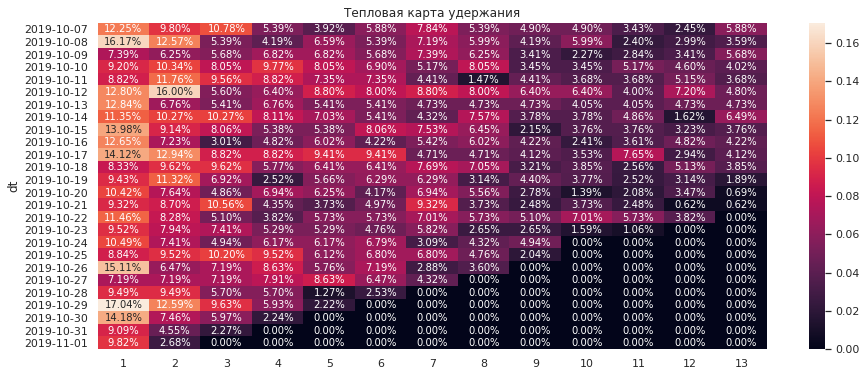

In [40]:
plt.figure(figsize=(15, 6)) 
sns.heatmap(
    retention.drop(columns=['cohort_size', 0]),
    annot=True,  
    fmt='.2%',  
)
plt.title('Тепловая карта удержания') 
plt.show()

***В первые дни самое лучшее удержание у всех когорт, к 14 дню удержание упало у всех когорт***


***Строим хитмэп с учётом горизонта анализа 14***

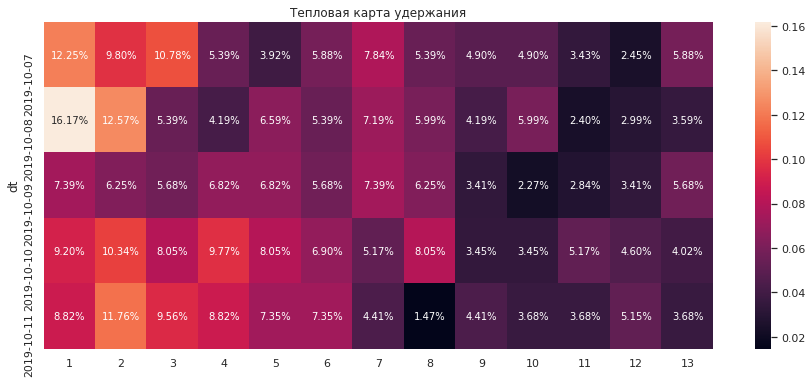

In [41]:
retention_raw, retention = get_retention(
    profiles, mobile_app, datetime(2019, 10, 24).date(), 14
)

plt.figure(figsize = (15, 6)) 
sns.heatmap(retention.drop(columns = ['cohort_size', 0]), 
            annot = True, 
            fmt = '.2%'
           )
plt.title('Тепловая карта удержания')
plt.show()

***Самое хорошее удержание в первые дни привлечения пользователей***

In [42]:
retention

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
dt,,,,,,,,,,,,,,,
2019-10-07,204,1.00,0.12,0.10,0.11,0.05,0.04,0.06,0.08,0.05,0.05,0.05,0.03,0.02,0.06
2019-10-08,167,1.00,0.16,0.13,0.05,0.04,0.07,0.05,0.07,0.06,0.04,0.06,0.02,0.03,0.04
2019-10-09,176,1.00,0.07,0.06,0.06,0.07,0.07,0.06,0.07,0.06,0.03,0.02,0.03,0.03,0.06
2019-10-10,174,1.00,0.09,0.10,0.08,0.10,0.08,0.07,0.05,0.08,0.03,0.03,0.05,0.05,0.04
2019-10-11,136,1.00,0.09,0.12,0.10,0.09,0.07,0.07,0.04,0.01,0.04,0.04,0.04,0.05,0.04


In [43]:
report = retention.drop(columns = ['cohort_size']).T

report

dt,2019-10-07,2019-10-08,2019-10-09,2019-10-10,2019-10-11
0,1.00,1.00,1.00,1.00,1.00
1,0.12,0.16,0.07,0.09,0.09
2,0.10,0.13,0.06,0.10,0.12
3,0.11,0.05,0.06,0.08,0.10
4,0.05,0.04,0.07,0.10,0.09
5,0.04,0.07,0.07,0.08,0.07
6,0.06,0.05,0.06,0.07,0.07
7,0.08,0.07,0.07,0.05,0.04
8,0.05,0.06,0.06,0.08,0.01
9,0.05,0.04,0.03,0.03,0.04


***Строим кривые удержания***

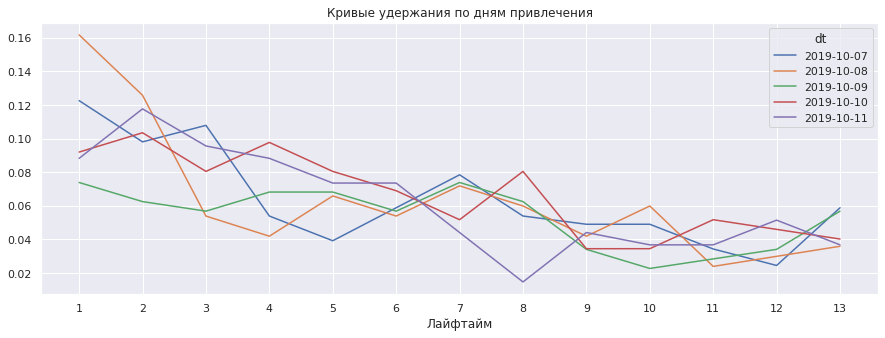

In [44]:
report = retention.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True, 
    xticks=list(report.columns.values), 
    figsize=(15, 5), 
)
plt.xlabel('Лайфтайм') 
plt.title('Кривые удержания по дням привлечения')
plt.show()

***Для некоторых когорт выделяется 8 и  9 октября, 9 у некоторых резкий спад в удержании, но затем сново графики идут вверх***

In [45]:
def get_retention(
    profiles,
    mobile_app,
    observation_date,
    horizon_days,
    dimensions=[], 
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        mobile_app[['user_id', 'event_time']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days


    result_grouped = result_raw.pivot_table(
        index=dimensions,  
        columns='lifetime',
        values='user_id',
        aggfunc='nunique',
    )
    cohort_sizes = (
        result_raw.groupby(dimensions) 
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'  
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    
    result_grouped['cohort_size'] = cohort_sizes

    
    return result_raw, result_grouped

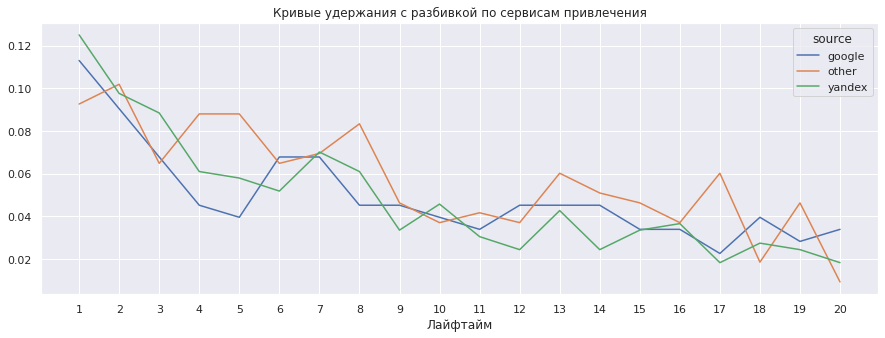

In [46]:
retention_raw, retention = get_retention(
    profiles, mobile_app, datetime(2019, 10, 30).date(), 21, dimensions=['source']
)

report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по сервисам привлечения')
plt.show()

***У всех 3х групп удержание с 8 дня примерно одинаковое(в равных пропорциях возвращаются в приложение), скачет график для других источников, yandex и google примерно в одном промежутке, источник скачивания не влияет на пользование приложением***

# Узнаем, пользователи какой группы часто делают целевое событие(конверсия в целевое действие)

In [47]:
mobile_app = mobile_sourсes.merge(mobile_dataset, on = 'user_id', how = 'left')

In [48]:
mobile_app[mobile_app['source'] == 'google'].duplicated().sum()

0

In [49]:
mobile_app[mobile_app['source'] == 'other'].duplicated().sum()

0

In [50]:
mobile_app[mobile_app['source'] == 'yandex'].duplicated().sum()

0

In [51]:
mobile_app.groupby('user_id').agg({'source':'nunique'}).query('source > 1')

,source
user_id,


***Дубликатов и пересекающихся пользователей нет между группами***

In [52]:
mobile_app.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)

event_name
tips_show        2801
map              1456
photos_show      1095
contacts_show     981
search_1          787
advert_open       751
search_5          663
search_4          474
favorites_add     351
search_6          330
tips_click        322
search_2          242
contacts_call     213
search_3          208
search_7          157
Name: user_id, dtype: int64

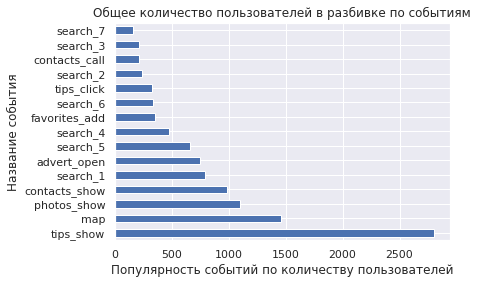

In [53]:
ax = mobile_app.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).plot(kind='barh')
ax.set_xlabel('Популярность событий по количеству пользователей')
ax.set_ylabel('Название события')
ax.set_title('Общее количество пользователей в разбивке по событиям')
plt.show()

In [54]:
mobile_app_yandex = mobile_app[mobile_app['source'] == 'yandex'].groupby('event_name')['user_id'].nunique().sort_values(ascending=False)
mobile_app_yandex 

event_name
tips_show        1310
map               687
contacts_show     478
photos_show       443
search_1          345
advert_open       297
search_5          210
search_4          163
favorites_add     160
tips_click        150
search_6          105
contacts_call      92
search_2           77
search_3           61
search_7           56
Name: user_id, dtype: int64

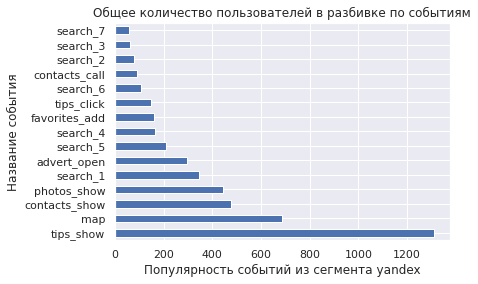

In [55]:
ax = mobile_app[mobile_app['source'] == 'yandex'].groupby('event_name')['user_id'].nunique().sort_values(ascending=False).plot(kind='barh')
ax.set_xlabel('Популярность событий из сегмента yandex')
ax.set_ylabel('Название события')
ax.set_title('Общее количество пользователей в разбивке по событиям')
plt.show()

***Из источника yandex, у пользователей больше всех уникальных пользователей по клику на показы рекомендованного объявления(1310), по целевому действию(contacts_show) прошло 478 пользователей***

In [56]:
mobile_app[mobile_app['source'] == 'google'].groupby('event_name')['user_id'].nunique().sort_values(ascending=False)

event_name
tips_show        651
photos_show      363
map              354
search_1         305
contacts_show    275
advert_open      195
search_5         137
favorites_add    114
search_4         108
tips_click        71
search_6          68
contacts_call     67
search_2          67
search_3          55
search_7          18
Name: user_id, dtype: int64

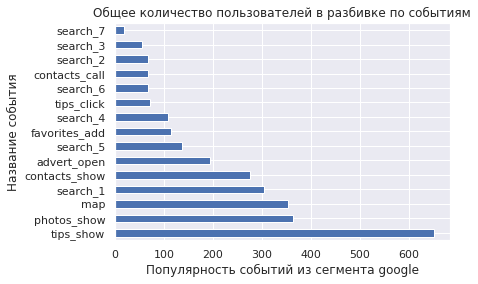

In [57]:
ax = mobile_app[mobile_app['source'] == 'google'].groupby('event_name')['user_id'].nunique().sort_values(ascending=False).plot(kind='barh')
ax.set_xlabel('Популярность событий из сегмента google')
ax.set_ylabel('Название события')
ax.set_title('Общее количество пользователей в разбивке по событиям')
plt.show()

***Из источника google, по рекомендованному объявлению переходят 651 пользоватеь , до целевого действия(contacts_show) дошло 275 пользователей***


In [58]:
mobile_app[mobile_app['source'] == 'other'].groupby('event_name')['user_id'].nunique().sort_values(ascending=False)

event_name
tips_show        840
map              415
search_5         316
photos_show      289
advert_open      259
contacts_show    228
search_4         203
search_6         157
search_1         137
tips_click       101
search_2          98
search_3          92
search_7          83
favorites_add     77
contacts_call     54
Name: user_id, dtype: int64

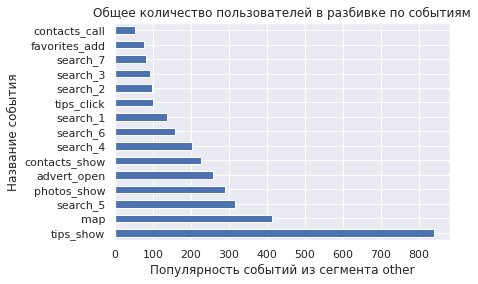

In [59]:
ax = mobile_app[mobile_app['source'] == 'other'].groupby('event_name')['user_id'].nunique().sort_values(ascending=False).plot(kind='barh')
ax.set_xlabel('Популярность событий из сегмента other')
ax.set_ylabel('Название события')
ax.set_title('Общее количество пользователей в разбивке по событиям')
plt.show()

***Из других источников, на рекомендованное объявление переходит 840 пользователей, до целевого действия(contacts_show) дошло 228 пользователей***

***Добавим столбец с номерами недель***

In [60]:
mobile_app['session_week'] = mobile_app['event_time'].dt.isocalendar().week


***Посмотрим конверсию в целевое действие contacts_show в каждой из 3х групп***

In [61]:
yandex = mobile_app[mobile_app['source'] == 'yandex']
yandex

,user_id,source,event_time,event_name,session_id,active_date,first_ts,lifetime,session_week
28,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07 00:00:02.245341,tips_show,2,2019-10-01,2019-10-01,0 days,41
29,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07 00:00:56.319813,advert_open,2,2019-10-01,2019-10-01,0 days,41
30,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07 00:01:19.993624,tips_show,2,2019-10-01,2019-10-01,0 days,41
31,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07 00:01:49.732803,advert_open,2,2019-10-01,2019-10-01,0 days,41
32,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07 00:02:06.225301,tips_show,2,2019-10-01,2019-10-01,0 days,41
...,...,...,...,...,...,...,...,...,...
74187,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex,2019-11-03 23:46:31.298524,contacts_show,26831,2019-11-01,2019-11-01,0 days,44
74188,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex,2019-11-03 23:48:47.344430,tips_click,26836,2019-11-01,2019-11-01,0 days,44
74189,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex,2019-11-03 23:50:05.753036,tips_click,26836,2019-11-01,2019-11-01,0 days,44
74190,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex,2019-11-03 23:51:08.879296,tips_click,26836,2019-11-01,2019-11-01,0 days,44


In [62]:
yandex_1 = yandex['user_id'].nunique()
yandex_1

1934

In [63]:
yandex_2 = yandex[yandex['event_name'] == 'contacts_show']['user_id'].nunique()
yandex_2

478

In [64]:
yandex_conversion = yandex_2 / yandex_1 * 100
yandex_conversion

24.715615305067217

***Конверсия пользователей из сервиса yandex, перешедших в contacts_show состовляет около 25%***

In [65]:
google = mobile_app[mobile_app['source'] == 'google']
google

,user_id,source,event_time,event_name,session_id,active_date,first_ts,lifetime,session_week
225,f32e1e2a-3027-4693-b793-b7b3ff274439,google,2019-10-07 00:09:33.715659,tips_show,5,2019-10-01,2019-10-01,0 days,41
226,f32e1e2a-3027-4693-b793-b7b3ff274439,google,2019-10-07 00:11:48.977227,tips_show,5,2019-10-01,2019-10-01,0 days,41
227,f32e1e2a-3027-4693-b793-b7b3ff274439,google,2019-10-07 00:13:34.329171,tips_show,5,2019-10-01,2019-10-01,0 days,41
228,f32e1e2a-3027-4693-b793-b7b3ff274439,google,2019-10-07 00:13:45.388325,tips_show,5,2019-10-01,2019-10-01,0 days,41
229,f32e1e2a-3027-4693-b793-b7b3ff274439,google,2019-10-07 00:15:03.196647,tips_show,5,2019-10-01,2019-10-01,0 days,41
...,...,...,...,...,...,...,...,...,...
74192,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:46:47.068179,map,26832,2019-11-01,2019-11-01,0 days,44
74193,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:46:58.914787,advert_open,26832,2019-11-01,2019-11-01,0 days,44
74194,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:47:01.232230,tips_show,26832,2019-11-01,2019-11-01,0 days,44
74195,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:47:47.475102,advert_open,26835,2019-11-01,2019-11-01,0 days,44


In [66]:
google_1 = google['user_id'].nunique()
google_1

1129

In [67]:
google_2 = google[google['event_name'] == 'contacts_show']['user_id'].nunique()
google_2

275

In [68]:
google_conversion = google_2 / google_1 * 100
google_conversion

24.357838795394155

***Конверсия пользователей из сервиса google, перешедших в contacts_show состовляет так же около 25%***

In [69]:
other = mobile_app[mobile_app['source'] == 'other']
other

,user_id,source,event_time,event_name,session_id,active_date,first_ts,lifetime,session_week
0,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:00.431357,advert_open,1,2019-10-01,2019-10-01,0 days,41
1,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:01.236320,tips_show,1,2019-10-01,2019-10-01,0 days,41
2,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:07.039334,tips_show,1,2019-10-01,2019-10-01,0 days,41
3,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:27.770232,advert_open,1,2019-10-01,2019-10-01,0 days,41
4,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:34.804591,tips_show,1,2019-10-01,2019-10-01,0 days,41
...,...,...,...,...,...,...,...,...,...
74167,804ba62d-0844-44cf-9853-0fd2d03ce3c8,other,2019-11-03 23:11:54.365996,photos_show,26817,2019-11-01,2019-11-01,0 days,44
74168,705682e7-ba20-46d1-93c0-e0096ded1ee1,other,2019-11-03 22:57:00.912638,photos_show,26806,2019-11-01,2019-11-01,0 days,44
74169,705682e7-ba20-46d1-93c0-e0096ded1ee1,other,2019-11-03 22:58:03.544251,photos_show,26806,2019-11-01,2019-11-01,0 days,44
74170,705682e7-ba20-46d1-93c0-e0096ded1ee1,other,2019-11-03 22:58:54.673142,photos_show,26806,2019-11-01,2019-11-01,0 days,44


In [70]:
other_1 = other['user_id'].nunique()
other_1

1230

In [71]:
other_2 = other[other['event_name'] == 'contacts_show']['user_id'].nunique()
other_2

228

In [72]:
other_conversion = other_2 / other_1 * 100
other_conversion

18.536585365853657

***Конверсия пользователей из других источников перешедших в contacts_show, меньше чем у google и yandex, всего 18%***

# Узнаем, как распределяется время между распространенными событиями пользователей из разных групп




***Выделяем год, номер месяца из времени начала сессии***

In [73]:
mobile_app['session_year'] = mobile_app['first_ts'].dt.year
mobile_app['session_month'] = mobile_app['first_ts'].dt.month
mobile_app['session_date'] = mobile_app['first_ts'].dt.date

In [74]:
mobile_app

,user_id,source,event_time,event_name,session_id,active_date,first_ts,lifetime,session_week,session_year,session_month,session_date
0,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:00.431357,advert_open,1,2019-10-01,2019-10-01,0 days,41,2019,10,2019-10-01
1,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:01.236320,tips_show,1,2019-10-01,2019-10-01,0 days,41,2019,10,2019-10-01
2,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:07.039334,tips_show,1,2019-10-01,2019-10-01,0 days,41,2019,10,2019-10-01
3,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:27.770232,advert_open,1,2019-10-01,2019-10-01,0 days,41,2019,10,2019-10-01
4,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:34.804591,tips_show,1,2019-10-01,2019-10-01,0 days,41,2019,10,2019-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...
74192,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:46:47.068179,map,26832,2019-11-01,2019-11-01,0 days,44,2019,11,2019-11-01
74193,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:46:58.914787,advert_open,26832,2019-11-01,2019-11-01,0 days,44,2019,11,2019-11-01
74194,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:47:01.232230,tips_show,26832,2019-11-01,2019-11-01,0 days,44,2019,11,2019-11-01
74195,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:47:47.475102,advert_open,26835,2019-11-01,2019-11-01,0 days,44,2019,11,2019-11-01


***Находим количество сессий и количество пользователей***

In [75]:
sessions_per_user = mobile_app.groupby(['session_year', 'session_month']).agg(
    {'user_id': ['count', 'nunique']}
)
sessions_per_user.columns = ['n_sessions', 'n_users']

sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)
sessions_per_user

n_sessions  n_users  sessions_per_user
session_year session_month                                        
2019         10                  70425     3949              17.83
             11                   3772      344              10.97

***В месяц, один пользователь, проводит в среднем 17 сессий***

***Для удобства отсортируем события по user_id, тогда события каждого пользователя будут идти последовательно***

In [76]:
mobile_time = mobile_app.sort_values('user_id')
mobile_time.head(5)

,user_id,source,event_time,event_name,session_id,active_date,first_ts,lifetime,session_week,session_year,session_month,session_date
2186,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-21 19:53:38.767230,map,11577,2019-10-01,2019-10-01,0 days,43,2019,10,2019-10-01
2204,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-22 11:30:05.522265,tips_show,11989,2019-10-01,2019-10-01,0 days,43,2019,10,2019-10-01
2203,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-22 11:28:05.165918,tips_show,11978,2019-10-01,2019-10-01,0 days,43,2019,10,2019-10-01
2202,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-22 11:25:33.508919,map,11978,2019-10-01,2019-10-01,0 days,43,2019,10,2019-10-01
2201,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-22 11:21:30.964099,tips_show,11978,2019-10-01,2019-10-01,0 days,43,2019,10,2019-10-01


***В колонке ’diff’ для каждого события отдельного пользователя посчитаем разницу между временем посещения страницы и временем посещения предыдущей страницы. Если страница была первой для пользователя, то значение в колонке ’diff’ будет NaT, т. к. нет предыдущего значения***

In [77]:
mobile_time['diff'] = mobile_app.groupby('user_id')['event_time'].diff(1)
mobile_time

,user_id,source,event_time,event_name,session_id,active_date,first_ts,lifetime,session_week,session_year,session_month,session_date,diff
2186,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-21 19:53:38.767230,map,11577,2019-10-01,2019-10-01,0 days,43,2019,10,2019-10-01,0 days 00:00:21.602221
2204,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-22 11:30:05.522265,tips_show,11989,2019-10-01,2019-10-01,0 days,43,2019,10,2019-10-01,0 days 00:02:00.356347
2203,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-22 11:28:05.165918,tips_show,11978,2019-10-01,2019-10-01,0 days,43,2019,10,2019-10-01,0 days 00:02:31.656999
2202,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-22 11:25:33.508919,map,11978,2019-10-01,2019-10-01,0 days,43,2019,10,2019-10-01,0 days 00:04:02.544820
2201,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-22 11:21:30.964099,tips_show,11978,2019-10-01,2019-10-01,0 days,43,2019,10,2019-10-01,0 days 00:01:18.392403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18864,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-10-18 13:43:03.193740,tips_show,8387,2019-10-01,2019-10-01,0 days,42,2019,10,2019-10-01,0 days 00:03:32.018425
18863,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-10-18 13:39:31.175315,contacts_show,8374,2019-10-01,2019-10-01,0 days,42,2019,10,2019-10-01,0 days 00:00:20.362999
18862,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-10-18 13:39:10.812316,tips_show,8374,2019-10-01,2019-10-01,0 days,42,2019,10,2019-10-01,0 days 00:01:30.392051
18868,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-10-18 13:45:40.318827,tips_show,8390,2019-10-01,2019-10-01,0 days,42,2019,10,2019-10-01,0 days 00:00:22.699021


In [78]:
mobile_time = mobile_time[['user_id', 'source', 'event_time', 'event_name', 'session_id',
       'active_date', 'first_ts', 'lifetime', 'session_year', 'session_week',
       'session_month', 'session_date', 'diff']]
mobile_time = mobile_time.sort_values(['user_id', 'event_time'])
mobile_time['diffs'] = mobile_time.groupby(['user_id'])['event_time'].transform(lambda x: x.diff().dt.days)
mobile_time = mobile_time.groupby(['user_id', 'source', 'event_time', 'event_name', 'session_id',
       'active_date', 'first_ts', 'lifetime', 'session_year', 'session_week',
       'session_month', 'session_date', 'diff']).sum().groupby('user_id').cumsum().reset_index()
mobile_time['id'] = mobile_time.apply(lambda row : row['user_id'] + '_session_' + str(2 if row['diffs'] > 10 else 1) + '_id', axis=1)
mobile_time

,user_id,source,event_time,event_name,session_id,active_date,first_ts,lifetime,session_year,session_week,session_month,session_date,diff,diffs,id
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31.052909,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:00:45.063550,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:05.722489,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:00:34.669580,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:20.735461,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:02:15.012972,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:30.917502,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:02:10.182041,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:43.212340,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:00:12.294838,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69899,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 15:51:23.959572,tips_show,26199,2019-11-01,2019-10-01,31 days,2019,44,10,2019-10-01,0 days 00:00:27.886483,12.00,fffb9e79-b927-4dbb-9b48-7fd09b23a62b_session_2_id
69900,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 15:51:57.899997,contacts_show,26204,2019-11-01,2019-10-01,31 days,2019,44,10,2019-10-01,0 days 00:00:33.940425,12.00,fffb9e79-b927-4dbb-9b48-7fd09b23a62b_session_2_id
69901,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 16:07:40.932077,tips_show,26248,2019-11-01,2019-10-01,31 days,2019,44,10,2019-10-01,0 days 00:15:43.032080,12.00,fffb9e79-b927-4dbb-9b48-7fd09b23a62b_session_2_id
69902,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 16:08:18.202734,tips_show,26248,2019-11-01,2019-10-01,31 days,2019,44,10,2019-10-01,0 days 00:00:37.270657,12.00,fffb9e79-b927-4dbb-9b48-7fd09b23a62b_session_2_id


In [79]:
mobile_time[(mobile_time['diff'].isnull()) | (mobile_time['diff'] > '1800 seconds')]

mobile_time

,user_id,source,event_time,event_name,session_id,active_date,first_ts,lifetime,session_year,session_week,session_month,session_date,diff,diffs,id
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31.052909,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:00:45.063550,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:05.722489,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:00:34.669580,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:20.735461,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:02:15.012972,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:30.917502,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:02:10.182041,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:43.212340,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:00:12.294838,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69899,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 15:51:23.959572,tips_show,26199,2019-11-01,2019-10-01,31 days,2019,44,10,2019-10-01,0 days 00:00:27.886483,12.00,fffb9e79-b927-4dbb-9b48-7fd09b23a62b_session_2_id
69900,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 15:51:57.899997,contacts_show,26204,2019-11-01,2019-10-01,31 days,2019,44,10,2019-10-01,0 days 00:00:33.940425,12.00,fffb9e79-b927-4dbb-9b48-7fd09b23a62b_session_2_id
69901,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 16:07:40.932077,tips_show,26248,2019-11-01,2019-10-01,31 days,2019,44,10,2019-10-01,0 days 00:15:43.032080,12.00,fffb9e79-b927-4dbb-9b48-7fd09b23a62b_session_2_id
69902,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 16:08:18.202734,tips_show,26248,2019-11-01,2019-10-01,31 days,2019,44,10,2019-10-01,0 days 00:00:37.270657,12.00,fffb9e79-b927-4dbb-9b48-7fd09b23a62b_session_2_id


***Найдем события, которые были первыми в сессиях.***

In [80]:
mobile_time['is_first_event_in_session'] = mobile_time['id'] == mobile_time['session_id']

***Вычислим время, проведенное на странице, руководствуясь временем посещения следующей страницы.Cчитаем разницу между предыдущей и следующей страницей внутри сессии.***

In [81]:
mobile_time['time_on_page'] = mobile_time.groupby(['session_id'])['event_time'].diff(1)
mobile_time

,user_id,source,event_time,event_name,session_id,active_date,first_ts,lifetime,session_year,session_week,session_month,session_date,diff,diffs,id,is_first_event_in_session,time_on_page
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31.052909,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:00:45.063550,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id,False,NaT
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:05.722489,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:00:34.669580,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id,False,0 days 00:00:34.669580
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:20.735461,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:02:15.012972,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id,False,0 days 00:02:15.012972
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:30.917502,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:02:10.182041,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id,False,0 days 00:02:10.182041
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:43.212340,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:00:12.294838,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id,False,0 days 00:00:12.294838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69899,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 15:51:23.959572,tips_show,26199,2019-11-01,2019-10-01,31 days,2019,44,10,2019-10-01,0 days 00:00:27.886483,12.00,fffb9e79-b927-4dbb-9b48-7fd09b23a62b_session_2_id,False,0 days 00:00:27.886483
69900,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 15:51:57.899997,contacts_show,26204,2019-11-01,2019-10-01,31 days,2019,44,10,2019-10-01,0 days 00:00:33.940425,12.00,fffb9e79-b927-4dbb-9b48-7fd09b23a62b_session_2_id,False,NaT
69901,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 16:07:40.932077,tips_show,26248,2019-11-01,2019-10-01,31 days,2019,44,10,2019-10-01,0 days 00:15:43.032080,12.00,fffb9e79-b927-4dbb-9b48-7fd09b23a62b_session_2_id,False,NaT
69902,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 16:08:18.202734,tips_show,26248,2019-11-01,2019-10-01,31 days,2019,44,10,2019-10-01,0 days 00:00:37.270657,12.00,fffb9e79-b927-4dbb-9b48-7fd09b23a62b_session_2_id,False,0 days 00:00:37.270657


In [82]:
mobile_time['time_on_page'] = mobile_time['time_on_page'] / np.timedelta64(1, 's')

In [83]:
mobile_time['time_on_page'] = mobile_time.groupby(['session_id'])['time_on_page'].shift(-1)
mobile_time

,user_id,source,event_time,event_name,session_id,active_date,first_ts,lifetime,session_year,session_week,session_month,session_date,diff,diffs,id,is_first_event_in_session,time_on_page
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31.052909,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:00:45.063550,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id,False,34.67
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:05.722489,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:00:34.669580,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id,False,135.01
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:20.735461,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:02:15.012972,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id,False,130.18
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:30.917502,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:02:10.182041,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id,False,12.29
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:43.212340,tips_show,101,2019-10-01,2019-10-01,0 days,2019,41,10,2019-10-01,0 days 00:00:12.294838,0.00,0001b1d5-b74a-4cbf-aeb0-7df5947bf349_session_1_id,False,47.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69899,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 15:51:23.959572,tips_show,26199,2019-11-01,2019-10-01,31 days,2019,44,10,2019-10-01,0 days 00:00:27.886483,12.00,fffb9e79-b927-4dbb-9b48-7fd09b23a62b_session_2_id,False,NaN
69900,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 15:51:57.899997,contacts_show,26204,2019-11-01,2019-10-01,31 days,2019,44,10,2019-10-01,0 days 00:00:33.940425,12.00,fffb9e79-b927-4dbb-9b48-7fd09b23a62b_session_2_id,False,NaN
69901,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 16:07:40.932077,tips_show,26248,2019-11-01,2019-10-01,31 days,2019,44,10,2019-10-01,0 days 00:15:43.032080,12.00,fffb9e79-b927-4dbb-9b48-7fd09b23a62b_session_2_id,False,37.27
69902,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03 16:08:18.202734,tips_show,26248,2019-11-01,2019-10-01,31 days,2019,44,10,2019-10-01,0 days 00:00:37.270657,12.00,fffb9e79-b927-4dbb-9b48-7fd09b23a62b_session_2_id,False,7.19


In [84]:
mobile_time['user_id'].nunique() # Количество пользователей
mobile_time['session_id'].nunique() # Количество сессий
mobile_time['id'].count() # Количество просмотров страниц (событий)
mobile_time['time_on_page'].mean() # Среднее время просмотра страниц

68.66916257458998

In [85]:
print('Количество пользователей {0}'.format(mobile_time['user_id'].nunique()))
print('Количество сессий {0}'.format(mobile_time['session_id'].nunique()))
print('Количество просмотров страниц (событий) {0}'.format(mobile_time['id'].count()))
print('Среднее время просмотра страниц {0}'.format(mobile_time['time_on_page'].mean()))


Количество пользователей 4228
Количество сессий 25394
Количество просмотров страниц (событий) 69904
Среднее время просмотра страниц 68.66916257458998


***Среднее время просмотра каждого события в среднем равно одной минуте***

In [86]:
print('Количество пользователей {0}'.format(mobile_time[mobile_time['source'] == 'yandex']['user_id'].nunique()))
print('Количество сессий {0}'.format(mobile_time[mobile_time['source'] == 'yandex']['session_id'].nunique()))
print('Количество просмотров страниц (событий) {0}'.format(mobile_time[mobile_time['source'] == 'yandex']['id'].count()))
print('Среднее время просмотра страниц {0}'.format(mobile_time[mobile_time['source'] == 'yandex']['time_on_page'].mean()))

Количество пользователей 1905
Количество сессий 11634
Количество просмотров страниц (событий) 32352
Среднее время просмотра страниц 73.18124725996717


***Среднее время просмотра каждого события у группы yandex в среднем равно 73 секунды***

In [87]:
time_y = mobile_time[mobile_time['source'] == 'yandex']['time_on_page'].mean()
time_y

73.18124725996717

In [88]:
time_g = mobile_time[mobile_time['source'] == 'google']['time_on_page'].mean()
time_g

66.72860289809127

In [89]:
print('Количество пользователей {0}'.format(mobile_time[mobile_time['source'] == 'google']['user_id'].nunique()))
print('Количество сессий {0}'.format(mobile_time[mobile_time['source'] == 'google']['session_id'].nunique()))
print('Количество просмотров страниц (событий) {0}'.format(mobile_time[mobile_time['source'] == 'google']['id'].count()))
print('Среднее время просмотра страниц {0}'.format(mobile_time[mobile_time['source'] == 'google']['time_on_page'].mean()))

Количество пользователей 1117
Количество сессий 7109
Количество просмотров страниц (событий) 19316
Среднее время просмотра страниц 66.72860289809127


***Среднее время просмотра каждого события у группы google в среднем равно 66 секунд***

In [90]:
print('Количество пользователей {0}'.format(mobile_time[mobile_time['source'] == 'other']['user_id'].nunique()))
print('Количество сессий {0}'.format(mobile_time[mobile_time['source'] == 'other']['session_id'].nunique()))
print('Количество просмотров страниц (событий) {0}'.format(mobile_time[mobile_time['source'] == 'other']['id'].count()))
print('Среднее время просмотра страниц {0}'.format(mobile_time[mobile_time['source'] == 'other']['time_on_page'].mean()))

Количество пользователей 1206
Количество сессий 6651
Количество просмотров страниц (событий) 18236
Среднее время просмотра страниц 62.6447380134657


***Среднее время просмотра каждого события у группы other в среднем равно 62 секунды***

# Выделим целевую и смежную аудиторию

***Целевой аудиторией у нас являются пользователи пришедшие из сервиса yandex, так как реклама yandex работает эффективнее всего и пользоватлей приходит гораздо больше чем у смежной аудитории. Cмежной аудиторией является сервис google и другие сервисы, так как приход пользователя от них гораздо меньше***

# Посмотрим частоту действий пользователей каждой группы по неделям.


In [91]:
yandex_action = yandex.groupby('event_name').agg({'session_id': 'count', 'user_id': 'nunique', 'session_week': 'nunique'}).sort_values(by='user_id',ascending=False)
yandex_action['events'] = yandex['event_name'].count()
yandex_action['percents'] = yandex_action['session_id'] / yandex_action['events'] * 100
yandex_action

,session_id,user_id,session_week,events,percents
event_name,,,,,
tips_show,19952,1310,4,34286,58.19
map,1943,687,4,34286,5.67
contacts_show,2035,478,4,34286,5.94
photos_show,3684,443,4,34286,10.74
search_1,1580,345,4,34286,4.61
advert_open,2625,297,4,34286,7.66
search_5,334,210,4,34286,0.97
search_4,265,163,4,34286,0.77
favorites_add,743,160,4,34286,2.17


In [92]:
yandex_3 = yandex.groupby('session_week').agg({'user_id': 'nunique', 'event_name': 'count', 'session_week': 'unique'})
yandex_3['events'] = mobile_app[mobile_app['source'] == 'yandex']['event_name'].count()
yandex_3['percents'] = yandex_3['event_name'] / yandex_3['events'] * 100
yandex_3

,user_id,event_name,session_week,events,percents
session_week,,,,,
41,538,8037,[41],34286,23.44
42,641,8404,[42],34286,24.51
43,697,9373,[43],34286,27.34
44,621,8472,[44],34286,24.71


In [93]:
yandex_z1 = mobile_app['session_id'].count()
yandex_z1

74197

In [94]:
yandex_z2 = mobile_app[mobile_app['source'] == 'yandex']['session_id'].count()
yandex_z2

34286

***Частота действий у группы yandex, лучше всего на 43 неделе(27.34%)***

In [95]:
google_action = google.groupby('event_name').agg({'session_id': 'count', 'user_id': 'nunique', 'session_week': 'nunique'}).sort_values(by='user_id',ascending=False)
google_action['events'] = google['event_name'].count()
google_action['percents'] = google_action['session_id'] / google_action['events'] * 100
google_action

,session_id,user_id,session_week,events,percents
event_name,,,,,
tips_show,9978,651,4,20445,48.80
photos_show,3466,363,4,20445,16.95
map,1028,354,4,20445,5.03
search_1,1427,305,4,20445,6.98
contacts_show,1440,275,4,20445,7.04
advert_open,1621,195,4,20445,7.93
search_5,226,137,4,20445,1.11
favorites_add,415,114,4,20445,2.03
search_4,145,108,4,20445,0.71


In [96]:
google_3 = google.groupby('session_week').agg({'user_id': 'nunique', 'event_name': 'count'})
google_3['events'] = mobile_app[mobile_app['source'] == 'google']['event_name'].count()
google_3['percents'] = google_3['event_name'] / google_3['events'] * 100
google_3

,user_id,event_name,events,percents
session_week,,,,
41,284,3856,20445,18.86
42,393,5314,20445,25.99
43,406,6008,20445,29.39
44,353,5267,20445,25.76


In [97]:
google_z1 = mobile_app['session_id'].count()
google_z2 = mobile_app[mobile_app['source'] == 'google']['session_id'].count()

***Частота действий у группы google, лучше всего на так же на 43 неделе(29.39%), значительный отрыв от 41 недели с 18.86%***

In [98]:
other_action = other.groupby('event_name').agg({'session_id': 'count', 'user_id': 'nunique', 'session_week': 'nunique'}).sort_values(by='user_id',ascending=False)
other_action['events'] = other['event_name'].count()
other_action['percents'] = other_action['session_id'] / other_action['events'] * 100
other_action

,session_id,user_id,session_week,events,percents
event_name,,,,,
tips_show,10125,840,4,19466,52.01
map,910,415,4,19466,4.67
search_5,489,316,4,19466,2.51
photos_show,2862,289,4,19466,14.70
advert_open,1918,259,4,19466,9.85
contacts_show,1054,228,4,19466,5.41
search_4,291,203,4,19466,1.49
search_6,222,157,4,19466,1.14
search_1,499,137,4,19466,2.56


In [99]:
other_3 = other.groupby('session_week').agg({'user_id': 'nunique', 'event_name': 'count'})
other_3['events'] = mobile_app[mobile_app['source'] == 'other']['event_name'].count()
other_3['percents'] = other_3['event_name'] / other_3['events'] * 100
other_3

,user_id,event_name,events,percents
session_week,,,,
41,308,3929,19466,20.18
42,404,4605,19466,23.66
43,443,5255,19466,27.00
44,442,5677,19466,29.16


***Частота действий у группы other, лучше всего на 44 неделе(29.16%), хороший  отрыв от 41 недели с 20.18%***

# Проверим гипотезу: группы yandex и google демонстрируют разную конверсию в просмотры контактов.

***Воспользуемся z-критерем по долям:***

- H0: Pазличий в конверсии между группами нет


- H1: Pазличия в конверсии между группами есть

In [100]:
def z_test(yandex_2, google_2, yandex_1, google_1, alpha=0.05):
    p1 = yandex_2 / yandex_1
    p2 = google_2 / google_1

    p_combined = (yandex_2 + google_2) / (yandex_1 + google_1)
    difference = p1 - p2

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/yandex_1 + 1/google_1)) 
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2 
    print('p-значение: ', p_value)
    if (p_value < alpha): 
        print('Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет')
        

In [101]:
print(z_test(yandex_2, google_2, yandex_1, google_1, alpha=0.05))

p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет
None


***Еще раз подтвердилось то, что между группами yandex и google в конверсии в целевое действие (просмотр контактов) разницы нет***

- H0:Разницы в количестве событий, от общего числа событий, между группами нет

     
- H1:Разница в количестве событий, от общего числа событий, между группами есть

In [102]:
def z_test(yandex_z2, google_z2, yandex_z1, google_z1, alpha=0.05):
    p1 = yandex_z2 / yandex_z1
    p2 = google_z2 / google_z1

    p_combined = (yandex_z2 + google_z2) / (yandex_z1 + google_z1)
    difference = p1 - p2

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/yandex_z1 + 1/google_z1)) 
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2 
    print('p-значение: ', p_value)
    if (p_value < alpha): 
        print('Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет')

In [103]:
print(z_test(yandex_z2, google_z2, yandex_z1, google_z1, alpha=0.05))

p-значение:  0.0
Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия
None


***Количество совершенных событий между группами yandex и google значительно отличается***

# Выводы и рекомендации

- Сервис yandex приносит гораздо больше пользователей в приложение чем google и другие сервисы;

- Пользователи с yandex и google в приложении ведут себя одинаково, конверсия в целевое действие  и время проведенное в приложении не отличается;

- Удержание пользователей на платформе у всех групп примерно одинаковое;

- Так как платформа yandex приносит почти в 2 раза больше пользователей, следует делать упор именно на неё, вкладываться в рекламму именно туда.